In [1]:
# import numpy as np

# Importing standard Qiskit libraries
from qiskit import *
from qiskit.visualization import *
from qiskit.tools.monitor import job_monitor
# from qiskit.tools.visualization import plot_histogram
# from qiskit.providers.aer import QasmSimulator
# from ibm_quantum_widgets import *
# from qiskit.tools.jupyter import *
# import pandas as pd

# Loading your IBM Quantum account(s)
# IBMQ.save_account("<your_access_token>") # Do this only once in a particular PC
provider = IBMQ.load_account()

## Getting output like this table is the AIM!
![img](./markdown_images/table.png)

## Plan
&emsp; From the above truth table we can say that:
  + M1 = not(S2) = S2'
  + M2 = not(S1) = S1'
  + M3 = S1 and S2 = S1 * S2

&emsp; So let's try that!\
(This was my trial only after reading the problem without reading the way they approached the problem)

**Note:** Henceforth we will work with indices starting from 0. So all the indices will shift by -1. i.e: M1 becomes M0, S2 becomes S1 and so on...

In [2]:
sensors = QuantumRegister(2, 'sensor')  # making the sensor registers
motors = QuantumRegister(3, 'motor')  # making the motor registers
creg_c = ClassicalRegister(3, 'c')  # making the classical register for the motors
circuit = QuantumCircuit(sensors, motors, creg_c)

In [3]:
ket_0 = [1, 0]
ket_1 = [0, 1]

# Demonstrating with sensor = |10>  Feel free to try with other 3 states (|00>, |01> and |11>) too.
quantumRead = [ket_1, ket_0]  # Similar to the digitalRead or analogRead functions of Arduino
circuit.initialize(quantumRead[0], [sensors[0]])
circuit.initialize(quantumRead[1], [sensors[1]])

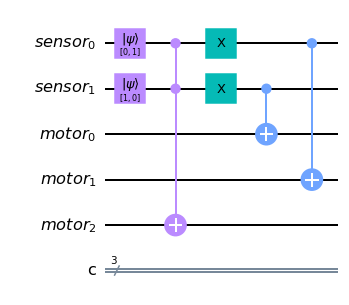

In [4]:
circuit.ccx(sensors[0], sensors[1], motors[2])
circuit.x(sensors[0])
circuit.x(sensors[1])
circuit.cx(sensors[1], motors[0])
circuit.cx(sensors[0], motors[1])
circuit.draw(output = 'mpl')

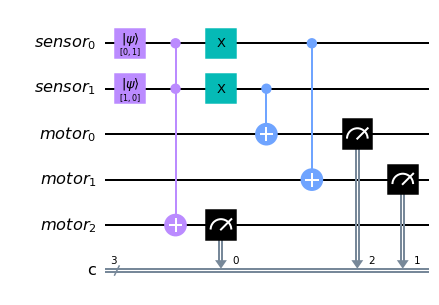

In [5]:
circuit.measure(motors[0], creg_c[2])
circuit.measure(motors[1], creg_c[1])
circuit.measure(motors[2], creg_c[0])
circuit.draw(output = 'mpl')

<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


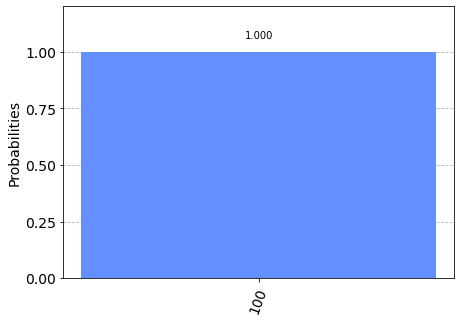

In [6]:
comp = Aer.get_backend("qasm_simulator")
results = execute(circuit, comp).result()
plot_histogram(results.get_counts(circuit))
# list(results.get_counts(circuit).keys())

In [ ]:
# Getting server with least queue length
provider = IBMQ.get_provider('ibm-q')
p = {
    "ibm_oslo": None,
    "ibmq_manila": None,
    "ibmq_quito": None,
    "ibmq_belem": None,
    "ibmq_lima": None
}
for system in p:
    q_comp = provider.get_backend(system)
    p[system] = q_comp.status().pending_jobs

In [ ]:
q_comp = provider.get_backend(min(p, key=p.get))
job = execute(circuit, q_comp)
job_monitor(job)

Job Status: job is queued (16)    

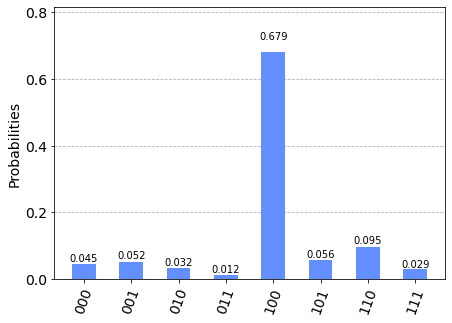

In [9]:
plot_histogram(job.result().get_counts(circuit))